In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Doc references
# http://strftime.org/
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [6]:
from pandas import datetime
def dateParser(x):
    return datetime.strptime(x,'%Y-%m')

In [8]:
#Example
timeData = "2019-01"
print(type(timeData))

<class 'str'>


In [9]:
finalDateTime = dateParser(timeData)
print(type(finalDateTime))
print(finalDateTime)

<class 'datetime.datetime'>
2019-01-01 00:00:00


In [10]:
data = pd.read_csv('sales-cars.csv' , 
                   index_col=0 , 
                   parse_dates=[0] , date_parser= dateParser)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2016-01-01 to 2018-12-01
Data columns (total 1 columns):
Sales    36 non-null int64
dtypes: int64(1)
memory usage: 576.0 bytes


In [12]:
data.head()

,Sales
Month,
2016-01-01,266
2016-02-01,146
2016-03-01,183
2016-04-01,119
2016-05-01,180


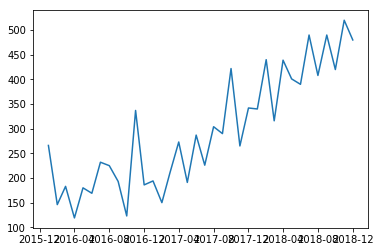

In [13]:
#Checking of Stationary Data format
plt.plot(data)

In [15]:
#Since my data is a trend data, we can perform integral with 1 step to convert the same into
#stationary data which will be an input for model
modifiedData = data.diff(periods=1)
modifiedData.dropna(inplace=True)
modifiedData.head()

,Sales
Month,
2016-02-01,-120.0
2016-03-01,37.0
2016-04-01,-64.0
2016-05-01,61.0
2016-06-01,-11.0


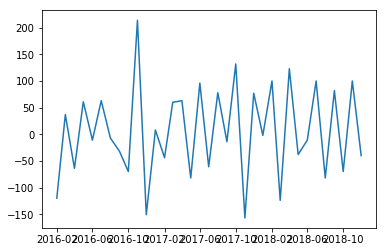

In [16]:
plt.plot(modifiedData)

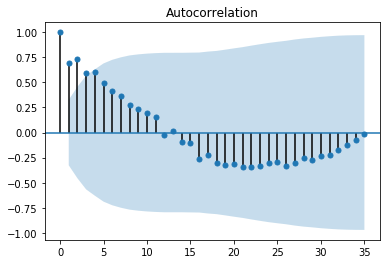

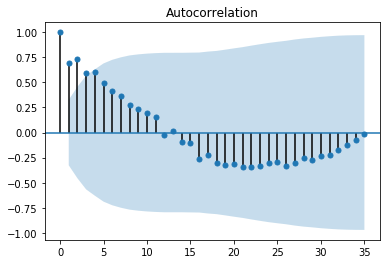

In [19]:
#Technique 2 ---- Check Autocorrelation
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data)

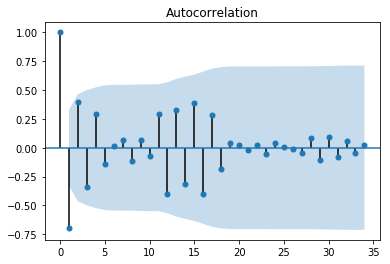

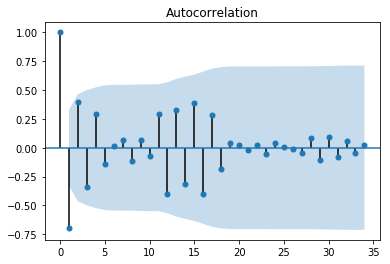

In [18]:
plot_acf(modifiedData)

In [24]:
#Create train test split as 80% 20% split
#Your data must be in the form of numpy array
features = modifiedData.values
train = features[0:27]
test = features[27:]

In [36]:
#AR model demo
from statsmodels.tsa.ar_model import AR
model1 = AR(train)
finalARModel = model1.fit()

In [52]:
predict = finalARModel.predict(start=27,end=34)
predict.shape

(8,)

In [46]:
test.shape

(8, 1)

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predict.reshape(-1,1))

17915.563224690162

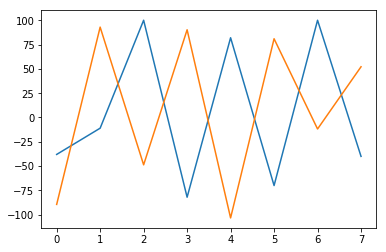

In [50]:
plt.plot(test)
plt.plot(predict)

In [53]:
#ARIMA IMPLEMENTATION
from statsmodels.tsa.arima_model import ARIMA
p=1
d=1
q=1
model2 = ARIMA(train, order=(p,d,q))
finalARIMAmodel = model2.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [54]:
finalARIMAmodel.aic

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


304.3610563324262

In [55]:
predictARIMA = finalARIMAmodel.forecast(steps = 9)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [57]:
predictARIMA[0]

array([-52.72048538,  72.33078344, -13.81133155,  48.34054963,
         6.36459828,  37.50425368,  17.30420652,  33.15344044,
        23.68989299])